## Análise Exploratória de Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

### Importando dados

In [2]:
result_01 = pd.read_csv('/datasets/project_sql_result_01.csv')
result_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [3]:
result_01.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
result_04 = pd.read_csv('/datasets/project_sql_result_04.csv')
result_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [5]:
result_04.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


### Análise do tipo de dados
Os tipos de dados estão de acordo com a informação que apresentam, quantidade de corridas são do tipo inteiro e médias são expressas em float. E os nomes são do tipo object

### Principais 10 bairros em termos de destinos

In [6]:
top10_neighboorhoods = result_04.sort_values('average_trips', ascending= False).head(10)
top10_neighboorhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### Gráficos

#### empresas de táxi e número de corridas

In [7]:
def filter_by_min_number_of_runs(df, number_of_runs):
    filtered_df = df
    filtered_df['company_name'] = filtered_df.where(filtered_df['trips_amount'] > number_of_runs, 'Other')
    # Agrupando valores por companhia com a soma das corridas por causa da quantidade 'Other' que está no Dataframe
    filtered_df = filtered_df.groupby('company_name').sum()
    filtered_df = filtered_df.sort_values('trips_amount', ascending = False)
    return filtered_df

In [8]:
# Como existem muitas empresas de táxi, vamos filtrar e pegar apenas as empresas que têm mais de 1000 de corridas 
# e as outras vamos juntar na categoria 'Other'
filtered_result_01_by_1000 = filter_by_min_number_of_runs(result_01,1000)
filtered_result_01_by_1000

,trips_amount
company_name,
Flash Cab,19558
Taxi Affiliation Services,11422
Medallion Leasing,10367
Yellow Cab,9888
Taxi Affiliation Service Yellow,9299
Chicago Carriage Cab Corp,9181
City Service,8448
Sun Taxi,7701
Star North Management LLC,7455


In [9]:
filtered_result_01_by_2000 = filter_by_min_number_of_runs(result_01,2000)
filtered_result_01_by_2000

,trips_amount
company_name,
Flash Cab,19558
Other,15590
Taxi Affiliation Services,11422
Medallion Leasing,10367
Yellow Cab,9888
Taxi Affiliation Service Yellow,9299
Chicago Carriage Cab Corp,9181
City Service,8448
Sun Taxi,7701


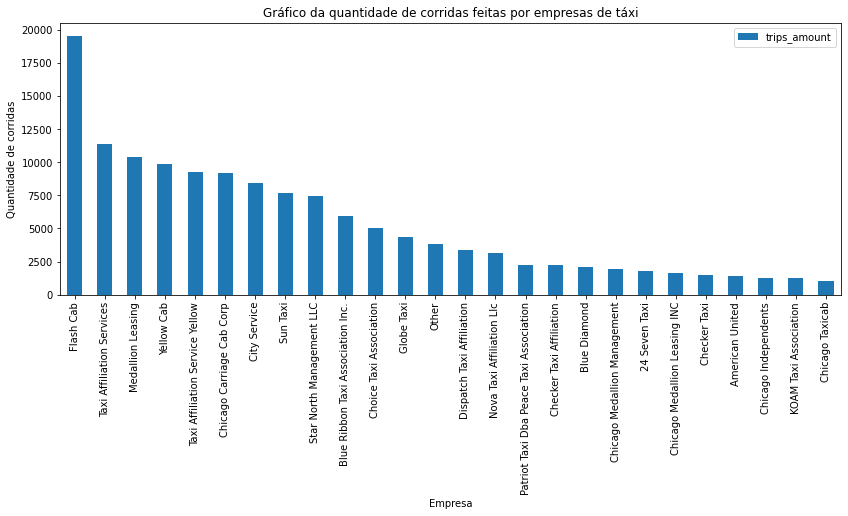

In [10]:
filtered_result_01_by_1000.plot(kind='bar', figsize=(14,5))
plt.title('Gráfico da quantidade de corridas feitas por empresas de táxi')
plt.xlabel('Empresa')
plt.ylabel('Quantidade de corridas')
plt.show()

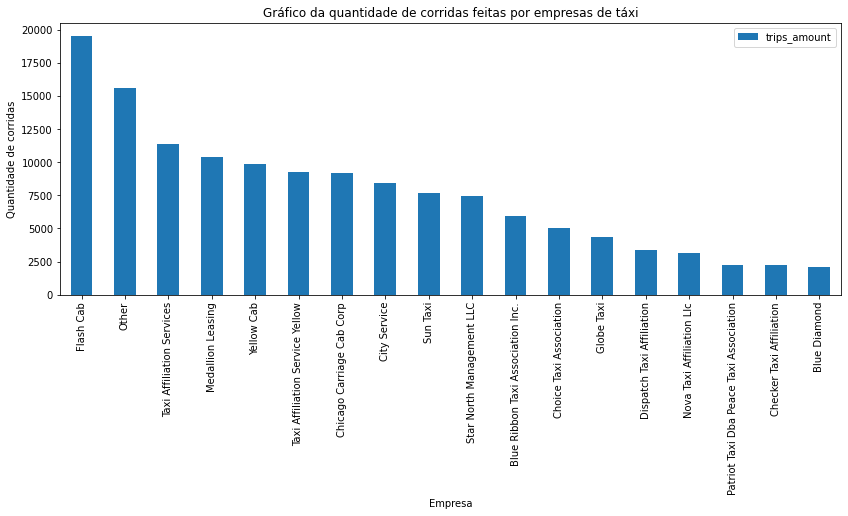

In [11]:
filtered_result_01_by_2000.plot(kind='bar', figsize=(14,5))
plt.title('Gráfico da quantidade de corridas feitas por empresas de táxi')
plt.xlabel('Empresa')
plt.ylabel('Quantidade de corridas')
plt.show()

##### Conclusões
A Empresa Flash Cab é a líder do mercado com uma boa margem de diferença para a segunda colocada, depois a uma divisão equilibrada mas com certa diferença entre as outras empresas que completam o top 9 das maiores empresas de táxi em Chicago. Existem várias empresas que fazem poucas corridas e mostra que a concentração de mercado não é muito grande, se juntarmos as corridas das empresas que fazem menos de 1000 corridas elas somadas seriam a 13 empresa com mais corridas em um mercado que teria 26 empresas. Caso o limite mude para 2000 corridas, essas empresas somadas seriam a segunda maior do mercado, onde existiriam 18 empresas.

#### top 10 bairros por número de corridas em que esse bairro é destino

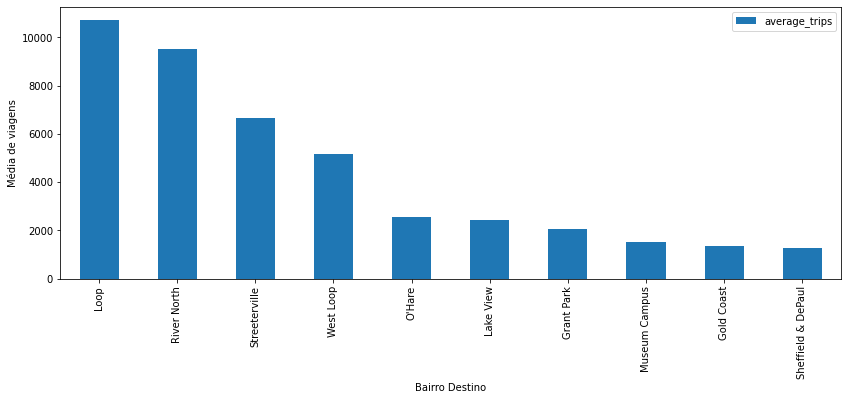

In [12]:
top10_neighboorhoods.plot(kind='bar', x='dropoff_location_name', figsize=(14,5))
plt.xlabel('Bairro Destino')
plt.ylabel('Média de viagens')
plt.show()

##### Conclusões
O Bairro mais popular como Destino é o Loop, porém não há tanta diferença para o segundo. Os bairros mais relevantes são os 4 mais populares, embora o bairro popular tenha quase o dobro de corridas que o bairro que ocupa a quarta posição. O restante dos bairros tem uma procura relativamente baixa. Portanto a população deve estar mais concentradas nesses bairros ou ter mais comércio e serviços que servem de destino para quem está na cidade.

## Teste de hipóteses

### Consultando e Trabalhando os dados

In [13]:
# Dataframe com os dados sobre viagens do Loop para o Aeroporto Internacional O'Hare
result_07 = pd.read_csv('/datasets/project_sql_result_07.csv')
result_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [14]:
result_07.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [15]:
result_07['start_ts'] = pd.to_datetime(result_07['start_ts'], format='%Y-%m-%d %H:%M:%S')
result_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


### Hipótese
"A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos." <br>
Hipótese Nula = 'A duração média não muda' <br>
Hipótese Alternativa = 'A duração média muda'

In [16]:
# O Dataframe contém apenas dados de corridas que aconteceram no sábado portanto não há necessidade de fatiar o os dados
# Vamos separar as corridas por condição do clima
good_conditions_runs_duration = result_07[result_07['weather_conditions'] == 'Good']['duration_seconds']
bad_conditions_runs_duration = result_07[result_07['weather_conditions'] == 'Bad']['duration_seconds']

In [17]:
#Limite de 5% para aceitar a hipótese nula, para cima ou para baixo, valor padrão usado
alpha = 0.05

#Teste Levene para suposição de igualdade das variâncias
runs_duration_l_test = st.levene(good_conditions_runs_duration, bad_conditions_runs_duration, center='mean')

print('valor-p: ', runs_duration_l_test.pvalue) # extraindo o valor-p

if runs_duration_l_test.pvalue < alpha: # comparando o valor-p com o limiar
    print("Rejeitamos a hipótese nula de Levene")
else:
    print("Não rejeitamos a hipótese nula de Levene") 


valor-p:  0.3968505113995001
Não rejeitamos a hipótese nula de Levene


In [18]:
#Realizando Teste T com equal_var=True
runs_duration_t_test = st.ttest_ind(good_conditions_runs_duration, bad_conditions_runs_duration, equal_var=True)


print('valor-p: ', runs_duration_t_test.pvalue) # extraindo o valor-p

if runs_duration_t_test.pvalue < alpha: # comparando o valor-p com o limiar
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p:  6.517970327099473e-12
Rejeitamos a hipótese nula


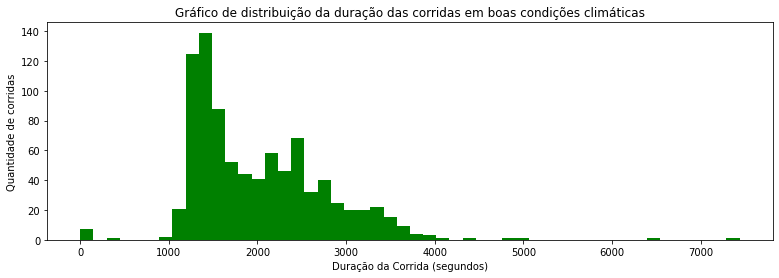

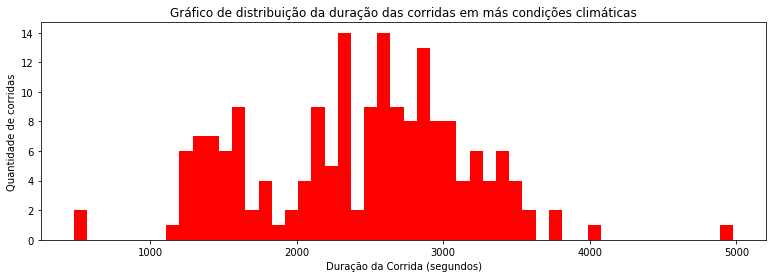

In [19]:
plt.figure(figsize=(13,4))
plt.title('Gráfico de distribuição da duração das corridas em boas condições climáticas')
plt.xlabel('Duração da Corrida (segundos)')
plt.ylabel('Quantidade de corridas')
plt.hist(good_conditions_runs_duration, 50, color='green')

plt.show()

plt.figure(figsize=(13,4))
plt.title('Gráfico de distribuição da duração das corridas em más condições climáticas')
plt.xlabel('Duração da Corrida (segundos)')
plt.ylabel('Quantidade de corridas')
plt.hist(bad_conditions_runs_duration, 50, color='red')
plt.show()

### Conclusão
A duração média das corridas em dias chuvosas de Loop para o aeroporto de O'Hare aumenta, conforme os gráficos demonstram há uma maior concentração entre 1000 e 1500 segundos nos dias sem chuva, mas nos dias chuvosos essa concentração aumenta para 2200 a 3000 segundos. Portanto se você pegar um táxi para o aeroporto e estiver atrasado é melhor que não esteja chovendo pois o tempo para chegar no p